# 從 url 直接下載檔案

In [1]:
import requests

url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
res = requests.get(url)
print(res.text)

with open("D:\\pm25.json", 'wb') as f:
    f.write(res.content)


[{"Site":"富貴角","county":"新北市","PM25":"9","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"麥寮","county":"雲林縣","PM25":"12","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"關山","county":"臺東縣","PM25":"7","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"馬公","county":"澎湖縣","PM25":"21","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"金門","county":"金門縣","PM25":"34","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"馬祖","county":"連江縣","PM25":"24","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"埔里","county":"南投縣","PM25":"20","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"復興","county":"高雄市","PM25":"11","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"永和","county":"新北市","PM25":"32","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"竹山","county":"南投縣","PM25":"21","DataCreationDate":"2020-03-09 11:00","ItemUnit":"μg/m3"},{"Site":"中壢","county

# 避免蓋掉舊檔，用時間做檔名

%a 本地簡化星期名稱  
%A 本地完整星期名稱  
%b 本地簡化的月份名稱  
%B 本地完整的月份名稱  
%c 本地相應的日期表示和時間表示  
** %d 月內中的一天（0-31）**  
** %H 24小時制小時數（0-23）**  
%I 12小時制小時數（01-12）  
%j 年內的一天（001-366）  
** %m 月份（01-12）**  
** %M 分鐘數（00=59）**  
%p 本地A.M.或P.M.的等價符  
** %S 秒（00-59）**  
%U 一年中的星期數（00-53）星期天為星期的開始  
%w 星期（0-6），星期天為星期的開始  
%W 一年中的星期數（00-53）星期一為星期的開始  
%x 本地相應的日期表示  
%X 本地相應的時間表示  
%y 兩位數的年份表示（00-99）  
** %Y 四位數的年份表示（000-9999）**  
%Z 當前時區的名稱  
%% %號本身  

In [2]:
import requests, time
from datetime import datetime

現在 = datetime.now()
print(現在)
ftime = 現在.strftime("%Y%m%d_%H%M%S")
print("時間格式化", ftime)

with open("D:\\pm25_"+ftime+".json", 'wb') as f:
    #f.write(res.content)
    f.write(b"xxxxxx")
    print("寫入完成", 現在)



2020-03-09 10:32:35.951997
時間格式化 20200309_103235
寫入完成 2020-03-09 10:32:35.951997


# 每隔幾分鐘抓一次，並新增一個檔案

In [ ]:
import requests, time
from datetime import datetime

while True:
    url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
    res = requests.get(url)
    print(res.text)

    現在 = datetime.now()
    ftime = 現在.strftime("%Y%m%d_%H%M%S")
    print("時間格式化", ftime)

    with open("D:\\pm25_"+ftime+".json", 'wb') as f:
        #f.write(res.content)
        f.write(res.content)
        print("寫入完成", 現在)

    time.sleep(60*5)

# 還是有問題: 雖然每隔 5 分鐘執行一次，但是，執行需要花時間的，尤其抓外網的資料，動輒花費幾十秒。那實際上後面時間誤差就會越來越大。

## 解法: sleep 的時間扣掉執行的時間。

In [ ]:
import requests, time
from datetime import datetime

while True:
    start = datetime.now()
    url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
    res = requests.get(url)
    print(res.text)

    現在 = datetime.now()
    ftime = 現在.strftime("%Y%m%d_%H%M%S")
    print("時間格式化", ftime)

    with open("D:\\pm25_"+ftime+".json", 'wb') as f:
        #f.write(res.content)
        f.write(res.content)
        print("寫入完成", 現在)
    td = datetime.now() - start
    print("花費", td.seconds, "秒")
    time.sleep(60*5-td.seconds)

# 時間戳記用 "現在" 合理嗎? 是不是可以用這批資料更新的時間來當作時間戳記呢?

## 由字串轉時間物件

    parse
    
    datetime.strptime("時間字串", "時間格式")
    
    # 範例
    datetime.strptime("03-09-2020 11:00", "%m-%d-%Y %H:%M")
    datetime.strptime("2020-03-09 11:00", "%Y-%m-%d %H:%M")
    datetime.strptime("2020-03-09 11:00:00", "%Y-%m-%d %H:%M:%S")
    datetime.strptime("20200309110000", "%Y%m%d%H%M%S")


In [ ]:
import requests, time
from datetime import datetime

while True:
    start = datetime.now()
    url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
    
    try:
        res = requests.get(url)
    except:
        print('ffffff')
        time.sleep(10)
        continue

    datas = res.json()
    creationDate = datetime.strptime(datas[0]['DataCreationDate'], "%Y-%m-%d %H:%M")
    ftime = creationDate.strftime("%Y%m%d%H%M")
    with open("D:\\pm25_"+ftime+".json", 'wb') as f:
        f.write(res.content)

    td = datetime.now() - start
    print("花費", td.seconds, "秒")
    time.sleep(60*30-td.seconds)

# 如果網路不穩或者資料主機暫時出錯，該如何確保可以繼續抓下去?

    這裡是進行例外處理的語法
    
    try:
        xxxxx
    except:
        xxxxx
       


In [3]:
import requests
url = "https://opendataxxxxx.epa.gov.tw/ws/Data/ATM00625/?$format=json"
try:
    res = requests.get(url)
    print(res.text)
except:
    print('糟糕，網站連不上!!')


糟糕，網站連不上!!


# 取出某測站一整天的數值

依據檔名規則取得每個時間點的數值

In [14]:
import requests, time, json, sys
from datetime import datetime, timedelta

start = datetime(2020, 3, 8, 0, 0)

print("時, PM2.5")
for i in range(24):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = "D:\\pm25_"+ftime+".json"
    try:
        with open(filename, 'r', encoding="UTF-8") as f:
            datas = json.loads(f.read())
            print(start.strftime("%H")+", ", datas[7]['PM25'])
    except:
        print(filename, sys.exc_info()[0], "not found!!")

    start = start + timedelta(hours=1) 


時, PM2.5
00,  23
01,  21
02,  20
03,  26
04,  24
05,  21
06,  27
07,  31
08,  28
09,  29
10,  30
11,  33
12,  25
13,  22
14,  19
15,  23
16,  19
17,  13
18,  12
19,  15
20,  15
21,  15
22,  18
23,  21


# 測站資料直接存入 excel

使用 pandas 套件

In [25]:
import requests, time, json
from datetime import datetime, timedelta
import pandas as pd

start = datetime(2020, 3, 8, 0, 0)

df = pd.DataFrame()

print("時\tPM2.5")

col1 = []
col2 = []
for i in range(20):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = "D:\\pm25_"+ftime+".json"
    try:
        with open(filename, 'r', encoding="UTF-8") as f:
            datas = json.loads(f.read())
            print(start.strftime("%H")+"\t"+datas[7]['PM25'])
            col1.append(start.strftime("%H"))
            col2.append(int(datas[7]['PM25']))
    except e:
        print(filename, e, "not found!!")

    start = start + timedelta(hours=1) 
    
df['時'] = pd.Series(col1)
df['PM2.5'] = pd.Series(col2)

#df.to_excel('D:\\pm25.xlsx')
df

時	PM2.5
00	23
01	21
02	20
03	26
04	24
05	21
06	27
07	31
08	28
09	29
10	30
11	33
12	25
13	22
14	19
15	23
16	19
17	13
18	12
19	15


,時,PM2.5
0,00,23
1,01,21
2,02,20
3,03,26
4,04,24
5,05,21
6,06,27
7,07,31
8,08,28
9,09,29


# 讀取 Excel 直接畫成折線圖

# 直接將數據繪製成折線圖

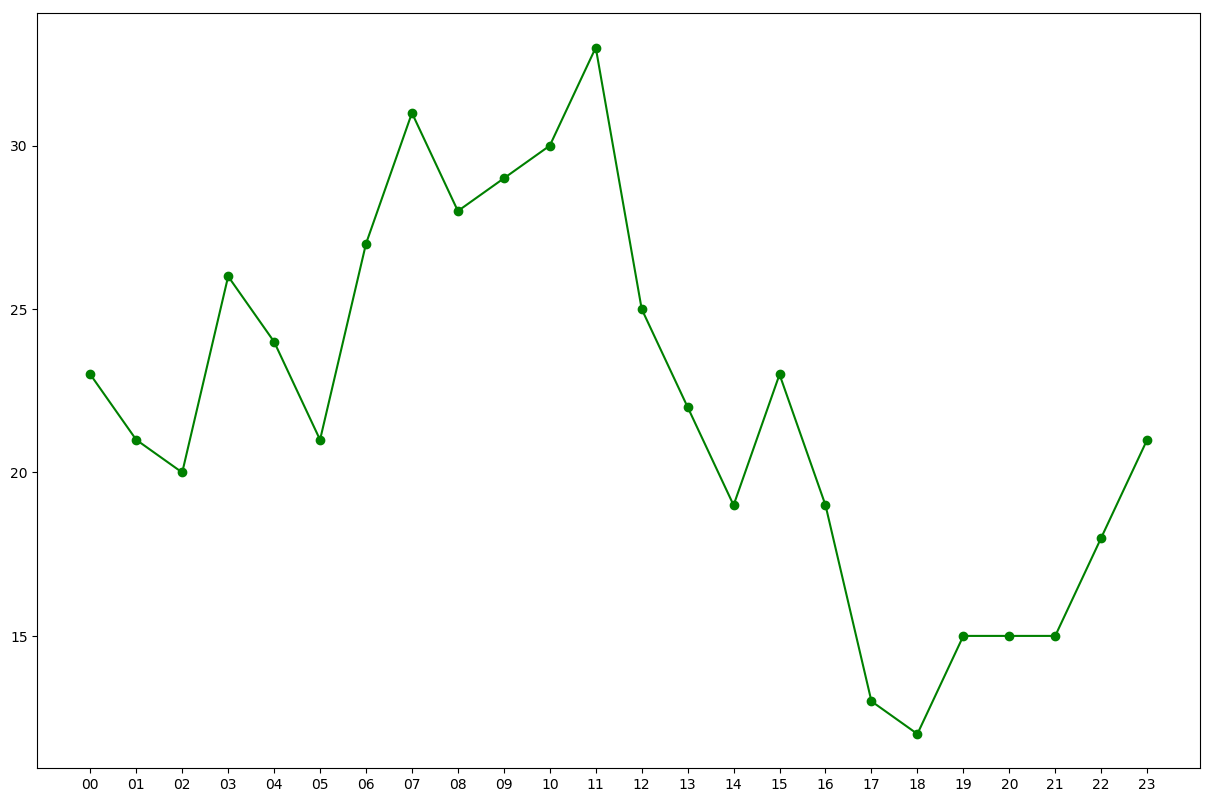

In [8]:
import requests, time, json, sys
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#%matplotlib inline

start = datetime(2020, 3, 8, 0, 0)

#print("時, PM2.5")
axis_x = []
axis_y = []
for i in range(24):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = "D:\\pm25_"+ftime+".json"
    try:
        with open(filename, 'r', encoding="UTF-8") as f:
            datas = json.loads(f.read())
            axis_x.append(start.strftime("%H"))
            axis_y.append(int(datas[7]['PM25']))
#            print(start.strftime("%H")+", ", datas[7]['PM25'])
    except:
        print(filename, sys.exc_info()[0], "not found!!")

    start = start + timedelta(hours=1) 

plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
plt.plot(axis_x,axis_y,'o-',color = 'g', label="PM25")